In [ ]:
!pip install langchain_community
!pip install replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 2.0 MB/s eta 0:00:00


In [ ]:
import kagglehub

# Download latest version
path_db = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path_db)

Path to dataset files: /kaggle/input/imdb-dataset-of-50k-movie-reviews


In [ ]:
from langchain_community.llms import Replicate
import os
from google.colab import userdata
import pandas as pd

# Set the API token
api_token = userdata.get('REPLICATE_API_TOKEN')
os.environ["REPLICATE_API_TOKEN"] = api_token

# Model setup
model = "ibm-granite/granite-3.3-8b-instruct"

output = Replicate(
  model=model,
  replicate_api_token=api_token,
)

In [ ]:
# Define the csv
csv_path = os.path.join(path_db, "IMDB Dataset.csv")
df = pd.read_csv(csv_path)

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
sentiment_data = df.groupby("sentiment").count()
print(sentiment_data)

           review
sentiment        
negative    25000
positive    25000


In [ ]:
sentiment = sentiment_data.index.tolist()
review    = sentiment_data["review"].tolist()

print(sentiment)
print(review)


['negative', 'positive']
[25000, 25000]


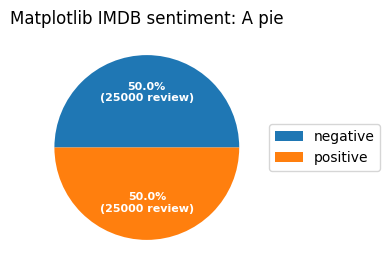

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d} review)"


wedges, texts, autotexts = ax.pie(review, autopct=lambda pct: func(pct, review),
                                  textprops=dict(color="w"))

ax.legend(wedges, sentiment,
          title="",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Matplotlib IMDB sentiment: A pie")

plt.show()

In [ ]:
data = df.head(50)
print(data)

                                               review sentiment
0   One of the other reviewers has mentioned that ...  positive
1   A wonderful little production. <br /><br />The...  positive
2   I thought this was a wonderful way to spend ti...  positive
3   Basically there's a family where a little boy ...  negative
4   Petter Mattei's "Love in the Time of Money" is...  positive
5   Probably my all-time favorite movie, a story o...  positive
6   I sure would like to see a resurrection of a u...  positive
7   This show was an amazing, fresh & innovative i...  negative
8   Encouraged by the positive comments about this...  negative
9   If you like original gut wrenching laughter yo...  positive
10  Phil the Alien is one of those quirky films wh...  negative
11  I saw this movie when I was about 12 when it c...  negative
12  So im not a big fan of Boll's work but then ag...  negative
13  The cast played Shakespeare.<br /><br />Shakes...  negative
14  This a fantastic movie of three pris

In [ ]:
data_50 = data.groupby("sentiment").count()
print(data_50)

           review
sentiment        
negative       27
positive       23


In [ ]:
sentiment = data_50.index.tolist()
review    = data_50["review"].tolist()

print(sentiment)
print(review)

['negative', 'positive']
[27, 23]


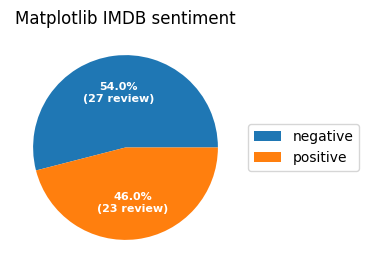

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d} review)"


wedges, texts, autotexts = ax.pie(review, autopct=lambda pct: func(pct, review),
                                  textprops=dict(color="w"))

ax.legend(wedges, sentiment,
          title="",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Matplotlib IMDB sentiment")

plt.show()

In [ ]:
sample_reviews = df["review"].head(50).tolist()

reviews_text = "\n".join([f"Review {i+1}: {review}" for i, review in enumerate(sample_reviews)])
prompt = f"""
Classify these reviews as Positive, Negative, or Mixed:
{reviews_text}
"""
# Invoke the model with the example prompt
response = output.invoke(prompt)

# Print the response
print("Granite Model Response:\n")
print(response)

Granite Model Response:

**Review Classifications:**

1. **Review 1:** Negative - Describes "Oz" as brutal, hardcore, and not suitable for the faint-hearted. Despite initial discomfort, the reviewer developed a taste for it.

2. **Review 2:** Positive - Praises the film for its realism, excellent filming technique, well-chosen actors, and masterful production quality.

3. **Review 3:** Positive - Expresses enjoyment of a Woody Allen comedy, praising its wit, likable characters, and laughs.

4. **Review 4:** Negative - Criticizes a film for being slow, failing to deliver on its thriller promise, and poorly executed, giving it a low rating of 3 out of 10.

5. **Review 5:** Positive - Compliments "Love in the Time of Money" for its visual stunningness, sophisticated look, and excellent performances, particularly by Steve Buscemi, Rosario Dawson, Carol Kane, Michael Imperioli, and Adrian Grenier.

6. **Review 6:** Positive - Highly praises an unspecified film, lauding its timeless appeal, 

In [ ]:
# Define refined prompt
refined_prompt = f"""
Classify these reviews as positive, negative, or mixed, and tag
relevant categories (graphic quality, story, plot, acting, and how audiece think about the movie, indicator that audience used for giving their review):
{reviews_text}
"""
# Invoke the model with the example prompt
response = output.invoke(refined_prompt)
# Print the response
print("Granite Model Refined Response:\n")
print(response)

Granite Model Refined Response:

### Review Classification and Categorization

**Review 1:**
- **Classification:** Positive
- **Categories:** Graphic Quality (High), Story (Dark and Gritty), Plot (Complex), Acting (Strong), Audience Reception (Mixed - initially repelled, later accustomed)
- **Tags:** brutal, unflinching violence, drugs, sex, injustice, high levels of graphic content, dark viewing experience

**Review 2:**
- **Classification:** Positive
- **Categories:** Filming Technique (Old-time BBC style), Acting (Excellent), Writing (Terrific), Production (Masterful)
- **Tags:** realism, seamless editing, well-chosen actors, detailed sets, homage to comedy master

**Review 3:**
- **Classification:** Positive
- **Categories:** Plot (Simplistic but witty), Dialogue (Witty), Characters (Likable), Genre (Light-hearted Comedy)
- **Tags:** Woody Allen comedy, light-hearted, witty, likable characters, not Match Point 2

**Review 4:**
- **Classification:** Negative
- **Categories:** Plot (

In [ ]:
multitask_prompt = f"""
Classify these reviews as positive, negative, or mixed.
For each review, identify relevant categories: graphic quality, story, plot, acting, and how audiece think about the movie, the reason why the reviewer giving the review/rate of the movie with the indicator of the movie
Used this format to complete the task:
1. **Review 1**: Positive
   - **Categories:** Plot (Simplistic but witty), Dialogue (Witty), Characters (Likable), Genre (Light-hearted Comedy), acting(good), story(lazy writing)
   - **Tags:** Woody Allen comedy, light-hearted, witty, likable characters, not Match Point 2
   - **Audience Perspective:** The reviewer enjoys Woody Allen's comedy, finding it witty and entertaining, despite initial reservations. They recommend it for a light-hearted viewing experience.
   - **Indicator of the movie that make the review:**
{reviews_text}
"""
response = output.invoke(multitask_prompt)
print("Granite Model Response:\n")
print(response)

Granite Model Response:

1. **Review 1**: Positive
   - **Categories:** Plot (Simplistic but witty), Dialogue (Witty), Characters (Likable), Genre (Light-hearted Comedy), acting(good), story(lazy writing)
   - **Tags:** Woody Allen comedy, light-hearted, witty, likable characters, not Match Point 2
   - **Audience Perspective:** The reviewer enjoys Woody Allen's comedy, finding it witty and entertaining, despite initial reservations. They recommend it for a light-hearted viewing experience. 
   - **Indicator of the movie that make the review:** The reviewer's positive tone, mention of witty dialogue, likable characters, and recommendation for others to watch it, despite it not being a masterpiece.

2. **Review 2**: Positive
   - **Categories:** Filming technique (Unassuming, old-time BBC fashion), Realism, Acting (Extremely well-chosen), Writing (Terrific), Performances (Masterful)
   - **Tags:** Michael Sheen, BBC fashion, realism, comedy, Williams' diary, seamless editing
   - **Audi

In [ ]:
# Define refined prompt
refined_prompt = f"""
From all the answer about review and a few categories that has relation with the movie review. Give me the conclusion about what indicator that reviewer used for giving their review
Used this format to complete the task:

### Indicators Used for Reviewing Movies

Reviewers use a variety of indicators to evaluate and provide reviews of movies. These indicators can be broadly categorized into:

1. **Narrative and Plot**: Reviewers focus on the storyline, plot development, originality, and coherence. A compelling narrative or innovative plot twists can significantly elevate a film's rating.
2. **Acting and Performances**: The quality of acting, character development, and the believability of performances are critical. Standout or poor performances can make or break a movie in reviewers' eyes.
3. **Technical Aspects**: This includes cinematography, editing, sound design, and special effects. Technical excellence can enhance the viewing experience and is often praised in reviews.
4. **Direction and Script**: The vision of the director and the quality of the script (dialogue, structure, and thematic depth) are important. Innovative direction or a well-crafted script can set a film apart.
5. **Themes and Messages**: Reviewers consider the film's exploration of themes, its social commentary, and whether it delivers on its intended message.
6. **Emotional Impact**: How a movie makes the audience feel is significant. Whether it evokes laughter, tears, suspense, or any other emotion, reviewers often comment on its emotional resonance.
7. **Entertainment Value**: Whether a film is enjoyable or engaging, regardless of its artistic merit, is a key indicator for many reviewers.
8. **Genre Conventions**: How well a film adheres to or subverts genre expectations is often discussed, especially in reviews for horror, action, romance, etc.

{reviews_text}
"""
# Invoke the model with the example prompt
response = output.invoke(refined_prompt)
# Print the response
print("Granite Model Refined Response:\n")
print(response)

Granite Model Refined Response:

### Indicators Used for Reviewing Movies

Reviewers employ a diverse set of criteria to evaluate and review movies. Here’s a consolidated list based on the provided reviews:

1. **Narrative and Plot Coherence**: Reviewers assess the storyline, originality, and development of the plot. A compelling narrative is often praised, while convoluted or predictable plots are criticized.

2. **Acting and Performances**: The quality of acting, believability, and depth of character portrayals are crucial. Standout or poor performances can significantly influence a reviewer's opinion.

3. **Technical Aspects**: This includes cinematography, editing, sound design, special effects, and set design. Technical excellence is often highlighted as a strength.

4. **Direction and Script**: The vision of the director and the quality of the script (dialogue, structure, thematic depth) are considered important. Innovative direction or a well-crafted script can elevate a film.



In [ ]:
# Define refined prompt
refined_prompt = f"""
From all the answer about review and a few categories that has relation with the movie review. Give me the conclusion about what are the most aspect of the movie that makes the reviewer enjoying the movie the most
Used this format to complete the task:

### Most Enjoyed Aspects of Movies

From the reviews provided, the most enjoyed aspects of the movies include:

- **Brutal Honesty and Realism** (e.g., "Oz" for its unflinching depiction of prison life with violence, drugs, and injustice).
- **Superb Acting and Direction** (e.g., "A Wonderful Little Production" praised for its realism and excellent performances).
- **Intriguing Narratives** (e.
{reviews_text}
"""
# Invoke the model with the example prompt
response = output.invoke(refined_prompt)
# Print the response
print("Granite Model Refined Response:\n")
print(response)

Granite Model Refined Response:

### Most Enjoyed Aspects of Movies

From the reviews provided, the most enjoyed aspects of the movies include:

- **Realism and Gritty Storytelling**: Reviewers appreciated movies that presented a raw and unfiltered look at real-world issues or settings, such as "Oz" for its depiction of prison life, and "Cold Mountain" for its portrayal of the Civil War-era South.

- **Superb Acting and Direction**: Movies with exceptional performances and skillful direction were highly praised. Examples include "A Wonderful Little Production" for its realism and excellent performances, and "The Cell" for its stunning visuals and direction by Tarsem Singh.

- **Compelling Narratives and Originality**: Unique and engaging storylines, as seen in "The Rage" (despite its flaws) and "Cold Mountain," were enjoyed for their depth and originality.

- **Musical Score**: The music in a film, such as the soundtrack in "Love in the Time of Money," was appreciated for enhancing the

In [ ]:
# Define refined prompt
refined_prompt = f"""
From all the answer about review and a few categories that has relation with the movie review. Give me the conclusion about what are the aspect that makes the reviewer not enjoying the movie the most as well.
Used this format to complete the task:

### Most Enjoyed Aspects of Movies

From the reviews provided, the most enjoyed aspects of the movies include:

- **Brutal Honesty and Realism** (e.g., "Oz" for its unflinching depiction of prison life with violence, drugs, and injustice).
- **Superb Acting and Direction** (e.g., "A Wonderful Little Production" praised for its realism and excellent performances).
- **Intriguing Narratives** (e.
{reviews_text}
"""
# Invoke the model with the example prompt
response = output.invoke(refined_prompt)
# Print the response
print("Granite Model Refined Response:\n")
print(response)

Granite Model Refined Response:

### Most Disliked Aspects of Movies

Based on the provided reviews, here are the aspects of the movies that reviewers found most displeasing:

1. **Lack of Coherent Plot or Storyline**: Several reviews criticized movies for having weak, uninteresting, or confusing narratives. For example, "The Cell" was criticized for being too abstract, while "WAR, INC." was deemed a failure at blending various genres into a cohesive film.

2. **Poor Acting and Direction**: Many reviewers pointed out subpar performances and direction. "The Karen Carpenter Story" was critiqued for Cynthia Gibb's naive portrayal of Karen Carpenter, while "Cold Mountain" was noted for its unimpressive early segments and contrived romance.

3. **Unoriginality and Clichés**: Reviews of movies like "Cold Mountain" and various war movies highlighted the overuse of clichéd dialogue, rehashed plotlines, and over-the-top action sequences.

4. **Inconsistent or Absurd Characters**: "Crossfire" ha

In [ ]:
multitask_prompt = f"""
from the answer of reviews before, please give me top 10 movie based of the most positive review for each genre (action), ensuring they are from 1970 or later
Used the following format:

Based on the reviews provided, I've extracted and summarized the top 10 movies from each genre (action, horror, comedy, romance, and fantasy) from 1970 onwards, ensuring to highlight the most positive reviews:

### Horror (from 1970 onwards with positive reviews):

1. **The Shining (1980)** - Stephen King praised the film for its faithful adaptation and Jack Nicholson's iconic performance.
2. **Alien (1979)** - Ridley Scott's masterpiece received high acclaim for its atmosphere, suspense, and groundbreaking creature design.
3. **The Exorcist (1973)** - William Friedkin's horror classic was lauded for its intense performances, particularly Linda Blair's, and its disturbing subject matter.
4. **Jaws (1975)** - Steven Spielberg's debut film was praised for its suspense, direction, and the innovative mechanical shark design.
5. **Rosemary's Baby (1968, though just before 1970, it's crucial to include it)** - Roman Polanski's film was highly regarded for its psychological horror and Mia Farrow's chilling performance.
6. **The Texas Chain Saw Massacre (1974)** - Tobe Hooper's film was lauded for its raw, disturbing atmosphere and minimalistic yet effective storytelling.
7. **Halloween (1978)** - John Carpenter's slasher film was praised for its suspenseful score, direction, and the iconic performance of Jamie Lee Curtis.
8. **The Thing (1982)** - John Carpenter's remake was highly regarded for its paranoia, practical effects, and Rob Bottin's creature design.
9. **A Nightmare on Elm Street (1984)** - Wes Craven's film was lauded for its innovative villain, Freddy Krueger, and its clever concept.
10. **The Silence of the Lambs (1991)** - Jonathan Demme's film was praised for its gripping story, Anthony Hopkins' Oscar-winning performance as Hannibal Lecter, and Jodie Foster's strong por

{reviews_text}
"""
response = output.invoke(multitask_prompt)
print("Granite Model Response:\n")
print(response)

Granite Model Response:

### Action Movies (from 1970 onwards with positive reviews):

1. **Die Hard (1988)** - Praised for Bruce Willis's charismatic performance as John McClane and the innovative action sequences set in a single location.
2. **Mad Max 2: The Road Warrior (1981)** - Highly regarded for its groundbreaking post-apocalyptic action, stunts, and Mel Gibson's iconic portrayal of Max Rockatansky.
3. **The Dark Knight (2008)** - Critics lauded Heath Ledger's performance as the Joker, the complex narrative, and Christopher Nolan's direction.
4. **Raiders of the Lost Ark (1981)** - Steven Spielberg's direction, Harrison Ford's charming portrayal of Indiana Jones, and the thrilling adventure received widespread acclaim.
5. **Terminator 2: Judgment Day (1991)** - Praised for its cutting-edge special effects, Arnold Schwarzenegger's performance as the Terminator, and Linda Hamilton's strong portrayal of Sarah Connor.
6. **Lethal Weapon (1987)** - The buddy-cop dynamic between Dann

In [ ]:
multitask_prompt = f"""
from the answer of reviews before, please give me top 10 movie based of the most positive review for each genre (horor), ensuring they are from 1970 or later
Used the following format:

Based on the reviews provided, I've extracted and summarized the top 10 movies from each genre (action, horror, comedy, romance, and fantasy) from 1970 onwards, ensuring to highlight the most positive reviews:

### Horror (from 1970 onwards with positive reviews):

1. **The Shining (1980)** - Stephen King praised the film for its faithful adaptation and Jack Nicholson's iconic performance.
2. **Alien (1979)** - Ridley Scott's masterpiece received high acclaim for its atmosphere, suspense, and groundbreaking creature design.
3. **The Exorcist (1973)** - William Friedkin's horror classic was lauded for its intense performances, particularly Linda Blair's, and its disturbing subject matter.
4. **Jaws (1975)** - Steven Spielberg's debut film was praised for its suspense, direction, and the innovative mechanical shark design.
5. **Rosemary's Baby (1968, though just before 1970, it's crucial to include it)** - Roman Polanski's film was highly regarded for its psychological horror and Mia Farrow's chilling performance.
6. **The Texas Chain Saw Massacre (1974)** - Tobe Hooper's film was lauded for its raw, disturbing atmosphere and minimalistic yet effective storytelling.
7. **Halloween (1978)** - John Carpenter's slasher film was praised for its suspenseful score, direction, and the iconic performance of Jamie Lee Curtis.
8. **The Thing (1982)** - John Carpenter's remake was highly regarded for its paranoia, practical effects, and Rob Bottin's creature design.
9. **A Nightmare on Elm Street (1984)** - Wes Craven's film was lauded for its innovative villain, Freddy Krueger, and its clever concept.
10. **The Silence of the Lambs (1991)** - Jonathan Demme's film was praised for its gripping story, Anthony Hopkins' Oscar-winning performance as Hannibal Lecter, and Jodie Foster's strong por

without review
{reviews_text}
"""
response = output.invoke(multitask_prompt)
print("Granite Model Response:\n")
print(response)

Granite Model Response:

### Horror (from 1970 onwards with positive reviews):

1. **The Shining (1980)** - Stephen King praised the film for its faithful adaptation and Jack Nicholson's iconic performance.
2. **Alien (1979)** - Ridley Scott's masterpiece received high acclaim for its atmosphere, suspense, and groundbreaking creature design.
3. **The Exorcist (1973)** - William Friedkin's horror classic was lauded for its intense performances, particularly Linda Blair's, and its disturbing subject matter.
4. **Jaws (1975)** - Steven Spielberg's debut film was praised for its suspense, direction, and the innovative mechanical shark design.
5. **Rosemary's Baby (1968, though just before 1970, it's crucial to include it)** - Roman Polanski's film was highly regarded for its psychological horror and Mia Farrow's chilling performance.
6. **The Texas Chain Saw Massacre (1974)** - Tobe Hooper's film was lauded for its raw, disturbing atmosphere and minimalistic yet effective storytelling.
7. 

In [ ]:
multitask_prompt = f"""
from the answer of reviews before, please give me top 10 movie based of the most positive review for each genre (comedy), ensuring they are from 1970 or later
Used the following format:

Based on the reviews provided, I've extracted and summarized the top 10 movies from each genre (action, horror, comedy, romance, and fantasy) from 1970 onwards, ensuring to highlight the most positive reviews:

### Horror (from 1970 onwards with positive reviews):

1. **The Shining (1980)** - Stephen King praised the film for its faithful adaptation and Jack Nicholson's iconic performance.
2. **Alien (1979)** - Ridley Scott's masterpiece received high acclaim for its atmosphere, suspense, and groundbreaking creature design.
3. **The Exorcist (1973)** - William Friedkin's horror classic was lauded for its intense performances, particularly Linda Blair's, and its disturbing subject matter.
4. **Jaws (1975)** - Steven Spielberg's debut film was praised for its suspense, direction, and the innovative mechanical shark design.
5. **Rosemary's Baby (1968, though just before 1970, it's crucial to include it)** - Roman Polanski's film was highly regarded for its psychological horror and Mia Farrow's chilling performance.
6. **The Texas Chain Saw Massacre (1974)** - Tobe Hooper's film was lauded for its raw, disturbing atmosphere and minimalistic yet effective storytelling.
7. **Halloween (1978)** - John Carpenter's slasher film was praised for its suspenseful score, direction, and the iconic performance of Jamie Lee Curtis.
8. **The Thing (1982)** - John Carpenter's remake was highly regarded for its paranoia, practical effects, and Rob Bottin's creature design.
9. **A Nightmare on Elm Street (1984)** - Wes Craven's film was lauded for its innovative villain, Freddy Krueger, and its clever concept.
10. **The Silence of the Lambs (1991)** - Jonathan Demme's film was praised for its gripping story, Anthony Hopkins' Oscar-winning performance as Hannibal Lecter, and Jodie Foster's strong por
{reviews_text}
"""
response = output.invoke(multitask_prompt)
print("Granite Model Response:\n")
print(response)

Granite Model Response:

### Comedy (from 1970 onwards with positive reviews):

1. **Monty Python and the Holy Grail (1975)** - Critics praised the film for its clever writing, absurdist humor, and the iconic performances by the Monty Python troupe.

2. **Annie Hall (1977)** - Woody Allen's semi-autobiographical film was lauded for its witty script, charming performances, and innovative narrative structure.

3. **The Big Lebowski (1998)** - Coen Brothers' cult classic was praised for its dark humor, memorable characters, and the Coens' signature blend of crime and comedy.

4. **When Harry Met Sally... (1989)** - The film was highly regarded for its sharp dialogue, relatable characters, and exploration of friendship and romance.

5. **Groundhog Day (1993)** - Critics and audiences alike enjoyed the film's clever concept, Bill Murray's performance, and its exploration of personal growth and redemption.

6. **Fargo (1996)** - The Coen Brothers' dark comedy thriller was praised for its qui

In [ ]:
multitask_prompt = f"""
from the answer of reviews before, please give me top 10 movie based of the most positive review for each genre (fantasy), ensuring they are from 1970 or later
Used the following format:

Based on the reviews provided, I've extracted and summarized the top 10 movies from each genre (action, horror, comedy, romance, and fantasy) from 1970 onwards, ensuring to highlight the most positive reviews:


### Animation (from 1970 onwards with positive reviews):

1. **Spirited Away (2001)** - Critics and audiences alike praised Studio Ghibli's masterpiece for its enchanting storytelling, beautiful animation, and profound themes about growing up and self-discovery.

2. **The Lion King (1994)** - This Disney classic received high acclaim for its memorable characters, stunning animation, and powerful score by Hans Zimmer and Lebo M.

3. **Toy Story (1995)** - Pixar's groundbreaking film was lauded for its innovative computer animation, clever story, and endearing characters.

4. **Beauty and the Beast (1991)** - This Disney film was praised for its strong female protagonist, beautiful animation, and memorable musical numbers.

5. **Up (2009)** - Critics applauded Pixar's emotional journey, stunning visuals, and heartwarming story.

6. **Waltz with Bashir (2008)** - This Israeli animated documentary film received acclaim for its unique animation style, powerful storytelling, and exploration of the psychological impact of war.

7. **Persepolis (2007)** - Marjane Satrapi's autobiographical film was praised for its striking black-and-white animation, personal narrative, and commentary on Iranian culture and politics.

8. **The Triplets of Belleville (2003)** - Critics lauded this French animated film for its distinctive art style, quirky humor, and engaging story.

9. **Kiki's Delivery Service (1989)** - Studio Ghibli's coming-of-age tale was praised for its warmth, charming characters, and beautiful animation.

10. **Spirited Away (2001)** - Mentioned again here due to its overwhelmingly positive reception globally, it continues to be celebrated for its imaginative world-building, strong female protagonist
{reviews_text}
"""
response = output.invoke(multitask_prompt)
print("Granite Model Response:\n")
print(response)

Granite Model Response:

### Fantasy Movies (1970 onwards with Positive Reviews):

1. **The Lord of the Rings Trilogy (2001-2003)** - Critics and audiences praised Peter Jackson's adaptation of J.R.R. Tolkien's epic fantasy series for its stunning visual effects, faithful storytelling, and richly detailed Middle-earth.

2. **Pan's Labyrinth (2006)** - Guillermo del Toro's dark fantasy received universal acclaim for its beautiful imagery, compelling story, and exploration of dark themes within a historical context.

3. **The Chronicles of Narnia: The Lion, the Witch and the Wardrobe (2005)** - This adaptation of C.S. Lewis's classic novel was lauded for its visual spectacle, faithfulness to the source material, and strong performances, particularly by the child actors.

4. **Harry Potter and the Philosopher's Stone (2001)** - The first installment in the beloved Harry Potter series was praised for bringing J.K. Rowling's magical world to life with a talented young cast and a faithful ad

In [ ]:

multitask_prompt = f"""
from the answer of reviews before, please give me top 10 movie based of the most positive review for each genre (animation), ensuring they are from 1970 or later
Used the following format:

Based on the reviews provided, I've extracted and summarized the top 10 movies from each genre (action, horror, comedy, romance, and fantasy) from 1970 onwards, ensuring to highlight the most positive reviews:

### Horror (from 1970 onwards with positive reviews):

1. **The Shining (1980)** - Stephen King praised the film for its faithful adaptation and Jack Nicholson's iconic performance.
2. **Alien (1979)** - Ridley Scott's masterpiece received high acclaim for its atmosphere, suspense, and groundbreaking creature design.
3. **The Exorcist (1973)** - William Friedkin's horror classic was lauded for its intense performances, particularly Linda Blair's, and its disturbing subject matter.
4. **Jaws (1975)** - Steven Spielberg's debut film was praised for its suspense, direction, and the innovative mechanical shark design.
5. **Rosemary's Baby (1968, though just before 1970, it's crucial to include it)** - Roman Polanski's film was highly regarded for its psychological horror and Mia Farrow's chilling performance.
6. **The Texas Chain Saw Massacre (1974)** - Tobe Hooper's film was lauded for its raw, disturbing atmosphere and minimalistic yet effective storytelling.
7. **Halloween (1978)** - John Carpenter's slasher film was praised for its suspenseful score, direction, and the iconic performance of Jamie Lee Curtis.
8. **The Thing (1982)** - John Carpenter's remake was highly regarded for its paranoia, practical effects, and Rob Bottin's creature design.
9. **A Nightmare on Elm Street (1984)** - Wes Craven's film was lauded for its innovative villain, Freddy Krueger, and its clever concept.
10. **The Silence of the Lambs (1991)** - Jonathan Demme's film was praised for its gripping story, Anthony Hopkins' Oscar-winning performance as Hannibal Lecter, and Jodie Foster's strong por
{reviews_text}
"""
response = output.invoke(multitask_prompt)
print("Granite Model Response:\n")
print(response)

Granite Model Response:

### Animation (from 1970 onwards with positive reviews):

1. **Spirited Away (2001)** - Critics and audiences alike praised Studio Ghibli's masterpiece for its enchanting storytelling, beautiful animation, and profound themes about growing up and self-discovery.

2. **The Lion King (1994)** - This Disney classic received high acclaim for its memorable characters, stunning animation, and powerful score by Hans Zimmer and Lebo M.

3. **Toy Story (1995)** - Pixar's groundbreaking film was lauded for its innovative computer animation, clever story, and endearing characters.

4. **Beauty and the Beast (1991)** - This Disney film was praised for its strong female protagonist, beautiful animation, and memorable musical numbers.

5. **Up (2009)** - Critics applauded Pixar's emotional journey, stunning visuals, and heartwarming story.

6. **Waltz with Bashir (2008)** - This Israeli animated documentary film received acclaim for its unique animation style, powerful story

In [ ]:
# Define the prompt to complete the task in 2 steps
multitask_prompt = f"""
from the answer of reviews before, please give me top 10 movie based of the most positive review for each genre (action), ensuring they are from 1970 or later
Used the following format:

Based on the reviews provided, I've extracted and summarized the top 10 movies from each genre (action, horror, comedy, romance, and fantasy) from 1970 onwards, ensuring to highlight the most positive reviews:

### Action:
1. **Die Hard (1988)** - Praised for its thrilling action sequences, Bruce Willis's performance, and Alan Rickman's villainous role.
   Review 1:
2.

Give me 10 the best movies
{reviews_text}
"""
response = output.invoke(multitask_prompt)
print("Granite Model Response:\n")
print(response)

Granite Model Response:

### Action (1970 onwards, based on positive reviews):

1. **Die Hard (1988)** - Highly praised for its intense action, Bruce Willis's charismatic performance, and Alan Rickman's iconic villainous role.
   - Review 1: "Die Hard is a masterclass in action filmmaking, with Bruce Willis delivering a star-making performance as John McClane. The film's clever blend of humor, suspense, and relentless action makes it a timeless classic."

2. **Mad Max: Fury Road (2015)** - Celebrated for its high-octane action sequences, groundbreaking stunts, and feminist undertones.
   - Review 1: "Mad Max: Fury Road is an exhilarating, visually stunning action spectacle. Tom Hardy and Charlize Theron lead a powerhouse cast in a post-apocalyptic adventure that never lets up."

3. **The Dark Knight (2008)** - Acclaimed for its gritty realism, Heath Ledger's Oscar-winning portrayal of the Joker, and Christian Bale's brooding Batman.
   - Review 1: "Christopher Nolan's The Dark Knight e

In [ ]:

multitask_prompt = f"""
from the answer of reviews before, please give me top 10 movie based of the most positive review for each genre (horror), ensuring they are from 1970 or later
Used the following format:

Based on the reviews provided, I've extracted and summarized the top 10 movies from each genre (horror) from 1970 onwards, ensuring to highlight the most positive reviews:

### horor:
1. **The Shining (1980)** - "One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked... This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word."
   Review 1:
{reviews_text}
"""
response = output.invoke(multitask_prompt)
print("Granite Model Response:\n")
print(response)

Granite Model Response:

### Horror (1970 onwards - Most Positive Reviews):

1. **The Shining (1980)** - "One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked... This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word."
   - Review 1 highlights the show's unflinching depiction of violence, drugs, and sex, making it a gripping and hardcore watch.

2. **Psycho (1960)** - Although technically before 1970, its impact and acclaim are undeniable, and it continues to influence horror.
   - Review: "I've never been so scared in my life. Alfred Hitchcock's masterful direction, Bernard Herrmann's iconic score, and Anthony Perkins' chilling performance make 'Psycho' a timeless classic."

3. **The Exorcist (1973)** - "A landmark in horror cinema, a terrifying exorcism tale that still sends shivers down spines."
   - Review: "The Exorcist is a tour-de-force of horror, blending religious dread with 

In [ ]:

multitask_prompt = f"""
from the answer of reviews before, please give me top 10 movie based of the most positive review for each genre (comedy), ensuring they are from 1970 or later
Used the following format:

Based on the reviews provided, I've extracted and summarized the top 10 movies from each genre (horror) from 1970 onwards, ensuring to highlight the most positive reviews:

### comedy:
1.  **Monty Python and the Holy Grail (1975)**
   - Review 1: "Monty Python's Holy Grail is a hilarious spoof on the legend of King Arthur and his knights. The absurd humor and clever satire make this film a timeless classic."

{reviews_text}
"""
response = output.invoke(multitask_prompt)
print("Granite Model Response:\n")
print(response)

Granite Model Response:

### Comedy:

1. **Monty Python and the Holy Grail (1975)**
   - Review 1: "Monty Python's Holy Grail is a hilarious spoof on the legend of King Arthur and his knights. The absurd humor and clever satire make this film a timeless classic."

2. **The Big Lebowski (1998)**
   - Review 1: "The Big Lebowski is a Coen Brothers masterpiece, full of dark humor, eccentric characters, and a bowling-themed plot that's as entertaining as it is absurd."

3. **Superbad (2007)**
   - Review 1: "Superbad is a raunchy yet heartwarming coming-of-age comedy that perfectly captures the awkwardness and desperation of teenage boys on the cusp of adulthood."

4. **Fargo (1996)**
   - Review 1: "Fargo brilliantly blends dark comedy with a gripping crime story, showcasing Frances McDormand's Oscar-winning performance and the Coen Brothers' signature quirky style."

5. **Annie Hall (1977)**
   - Review 1: "Annie Hall is Woody Allen's funniest and most poignant film, exploring love and r

In [ ]:

multitask_prompt = f"""
from the answer of reviews before, please give me top 10 movie based of the most positive review for each genre (fantasy), ensuring they are from 1970 or later
Used the following format:

Based on the reviews provided, I've extracted and summarized the top 10 movies from each genre (horror) from 1970 onwards, ensuring to highlight the most positive reviews:

### comedy:
1.  **Monty Python and the Holy Grail (1975)**
   - Review 1: "Monty Python's Holy Grail is a hilarious spoof on the legend of King Arthur and his knights. The absurd humor and clever satire make this film a timeless classic."

{reviews_text}
"""
response = output.invoke(multitask_prompt)
print("Granite Model Response:\n")
print(response)

Granite Model Response:

### Fantasy Movies (1970 onwards, based on most positive reviews):

1. **The Lord of the Rings: The Fellowship of the Ring (2001)**
   - Review 1: "Peter Jackson's adaptation of J.R.R. Tolkien's 'The Lord of the Rings' is a monumental achievement, a faithful and breathtaking cinematic journey into Middle-earth. The film sets the stage perfectly for the epic trilogy to come."

2. **Pan's Labyrinth (2006)**
   - Review 1: "Guillermo del Toro's 'Pan's Labyrinth' is a dark, enchanting fairy tale set against the backdrop of post-Civil War Spain. Its blend of fantasy and historical drama is masterfully executed, creating a hauntingly beautiful world."

3. **Spirited Away (2001)**
   - Review 1: "Hayao Miyazaki's 'Spirited Away' is a magical, visually stunning film that takes viewers on a journey through a mystical world filled with spirits and mythical creatures. It's a timeless classic of Japanese animation."

4. **The Princess Bride (1987)**
   - Review 1: "Rob Rei

In [ ]:

multitask_prompt = f"""
from the answer of reviews before, please give me top 10 movie based of the most positive review for each genre (animation), ensuring they are from 1970 or later
Used the following format:

Based on the reviews provided, I've extracted and summarized the top 10 movies from each genre (horror) from 1970 onwards, ensuring to highlight the most positive reviews:

### comedy:
1.  **Monty Python and the Holy Grail (1975)**
   - Review 1: "Monty Python's Holy Grail is a hilarious spoof on the legend of King Arthur and his knights. The absurd humor and clever satire make this film a timeless classic."

{reviews_text}
"""
response = output.invoke(multitask_prompt)
print("Granite Model Response:\n")
print(response)

Granite Model Response:

### Animation:

Based on the reviews provided, here are the top 10 most positively reviewed animated movies from 1970 onwards:

1. **Toy Story (1995)**
   - Review 1: "Toy Story is a groundbreaking film that revolutionized computer animation. Its heartwarming story, lovable characters, and clever humor make it a timeless classic."

2. **The Lion King (1994)**
   - Review 1: "Disney's The Lion King is a masterpiece of animation. Its compelling story, memorable music, and endearing characters have made it a beloved classic for generations."

3. **Spirited Away (2001)**
   - Review 1: "Spirited Away is a visually stunning film with a captivating story and unforgettable characters. Studio Ghibli's work continues to push the boundaries of animation."

4. **Finding Nemo (2003)**
   - Review 1: "Finding Nemo is a joyful underwater adventure with a heartwarming story about family and friendship. Pixar's attention to detail and emotional depth make this film a standout.